In [ ]:

#importing required librabries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sb.set_theme(style="whitegrid")

In [ ]:
#loading dataset
churndata = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [ ]:
churndata.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [ ]:
churndata.shape

(10002, 14)

In [ ]:
# Data Cleaning

# Drop irrelevant columns: RowNumber, CustomerId, Surname
churndata = churndata.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
print(churndata.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [ ]:
#Checking for missing values
churndata.isnull().sum()

,0
CreditScore,0
Geography,1
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,1
IsActiveMember,1
EstimatedSalary,0


In [ ]:
# Check for duplicate rows in the dataset
duplicate_rows = churndata[churndata.duplicated()]

In [ ]:
duplicate_rows

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10001,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [ ]:
# Count the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

In [ ]:
num_duplicates

2

In [ ]:
# Remove duplicate rows
churndata = churndata.drop_duplicates()

# Recheck the dataset for any remaining duplicate rows
remaining_duplicates = churndata[churndata.duplicated()]
num_remaining_duplicates = remaining_duplicates.shape[0]

# Display the count of remaining duplicates
num_remaining_duplicates

0

In [ ]:
# Fill missing values for 'HasCrCard' and 'IsActiveMember' using forward fill
churndata['HasCrCard'] = churndata['HasCrCard'].fillna(method='ffill')
churndata['IsActiveMember'] = churndata['IsActiveMember'].fillna(method='ffill')

# Fill missing value in 'Geography' with the mode (most frequent value)
geography_mode = churndata['Geography'].mode()[0]
churndata['Geography'].fillna(geography_mode, inplace=True)

# Fill missing value in 'Age' with the median
age_median = churndata['Age'].median()
churndata['Age'].fillna(age_median, inplace=True)

<ipython-input-13-f41dd5d345be>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  churndata['HasCrCard'] = churndata['HasCrCard'].fillna(method='ffill')
<ipython-input-13-f41dd5d345be>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  churndata['IsActiveMember'] = churndata['IsActiveMember'].fillna(method='ffill')
<ipython-input-13-f41dd5d345be>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the opera

In [ ]:
missing_values_final = churndata.isnull().sum()
print("Missing Values After Filling:\n", missing_values_final)

Missing Values After Filling:
 CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


<ipython-input-20-17e9bc0fd4b1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exited_counts.index, y=exited_counts, ax=axes[0], palette='Set2')


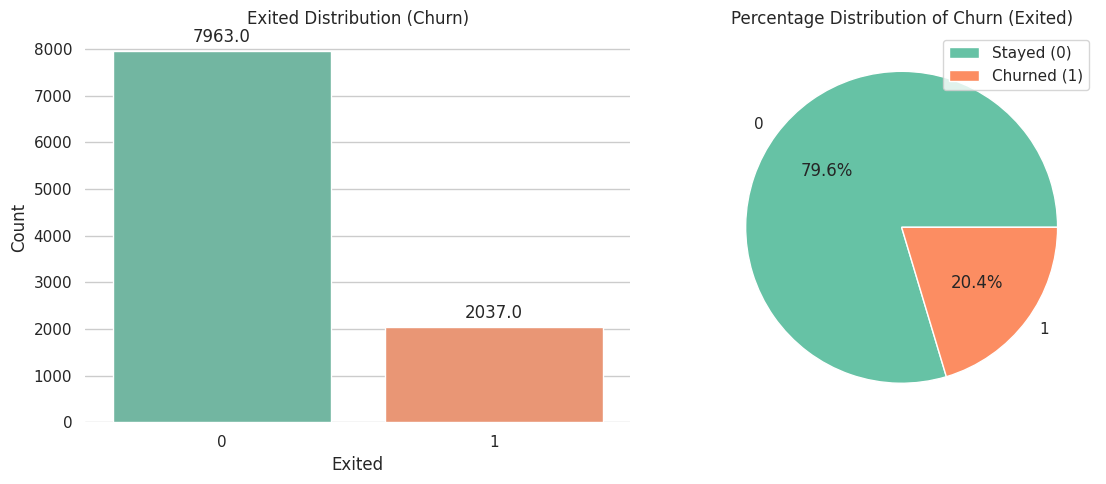

In [ ]:
# Create subplots for Exited feature
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
exited_counts = churndata['Exited'].value_counts()
sns.barplot(x=exited_counts.index, y=exited_counts, ax=axes[0], palette='Set2')
axes[0].set_title('Exited Distribution (Churn)')
axes[0].set_ylabel('Count')

for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.despine(left=True, bottom=True)

exited_percentage = churndata['Exited'].value_counts(normalize=True) * 100
axes[1].pie(exited_percentage, labels=exited_percentage.index, autopct='%1.1f%%',
            colors=sns.color_palette('Set2'))
axes[1].set_title('Percentage Distribution of Churn (Exited)')
plt.legend(['Stayed (0)', 'Churned (1)'])
plt.tight_layout()
plt.show()

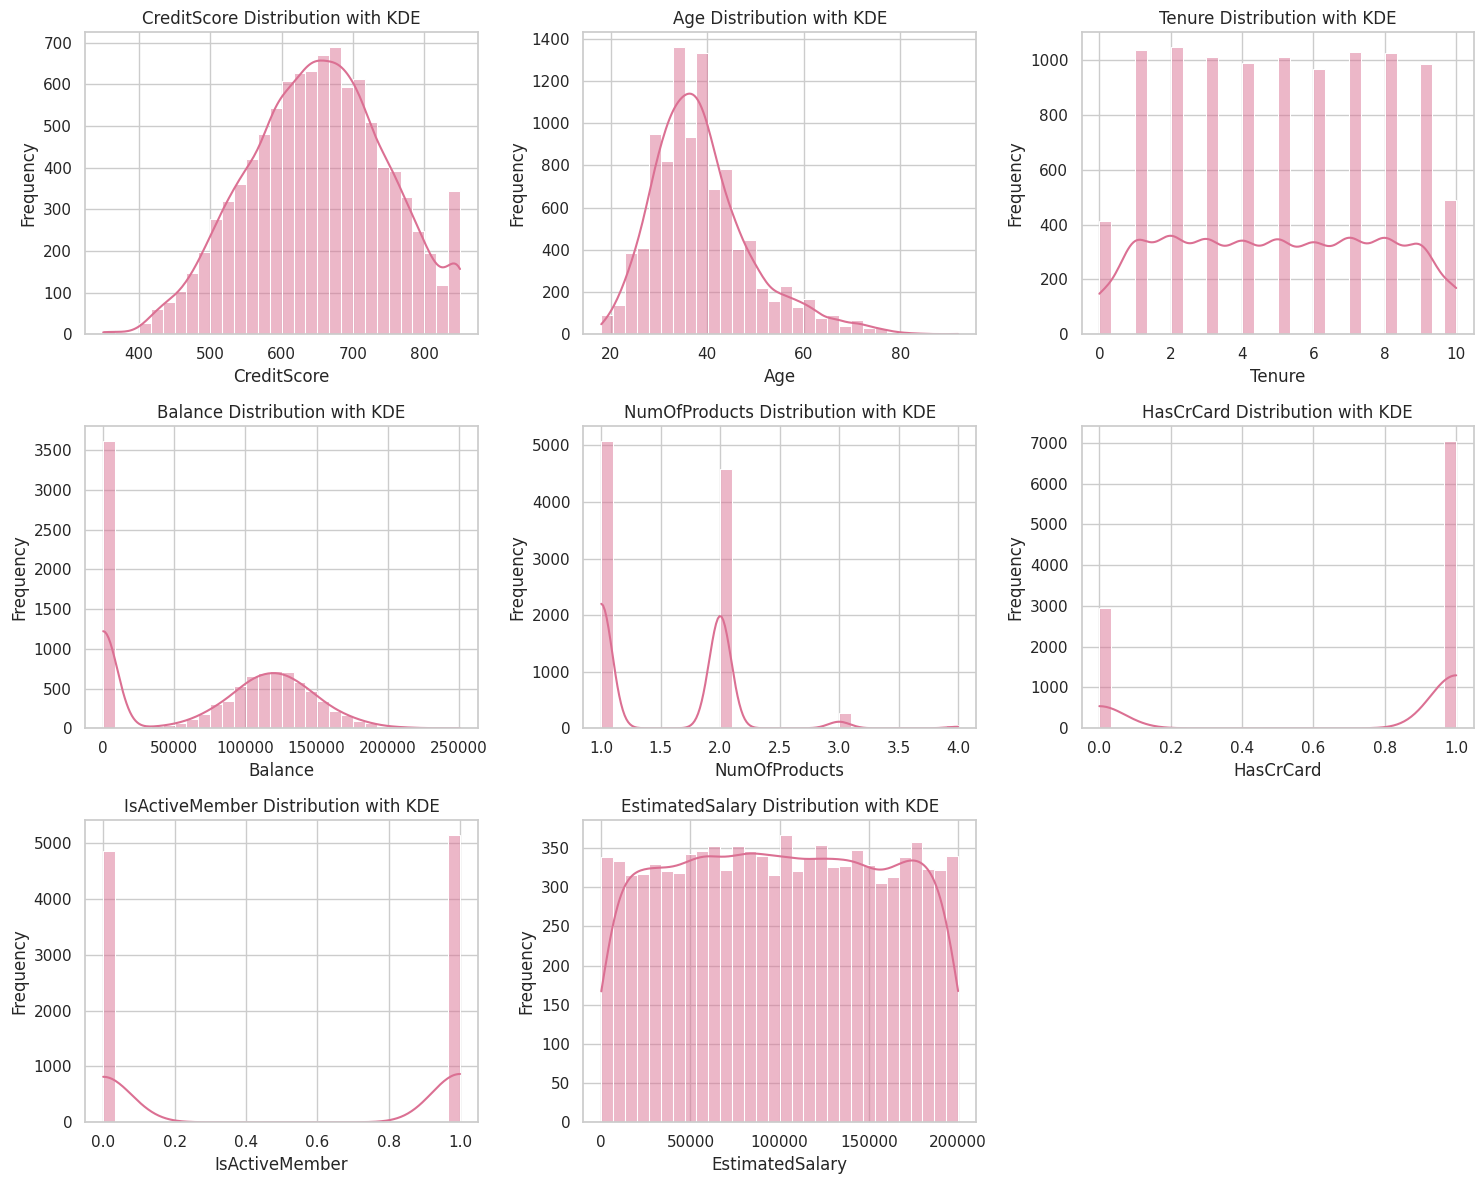

In [ ]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, columns):
    plt.figure(figsize=(15, 12))  # Adjust figure size to fit all plots

    for i, column in enumerate(columns, 1):
        plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots
        sns.histplot(data[column], kde=True, bins=30, color='palevioletred')
        plt.title(f'{column.replace("_", " ")} Distribution with KDE')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

columns_to_analyze = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

univariate_analysis(churndata, columns_to_analyze)

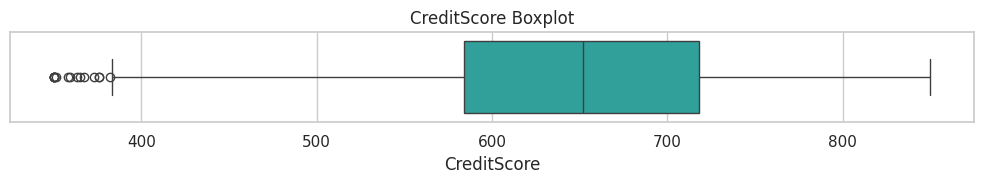


Summary Statistics for CreditScore:
 count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64


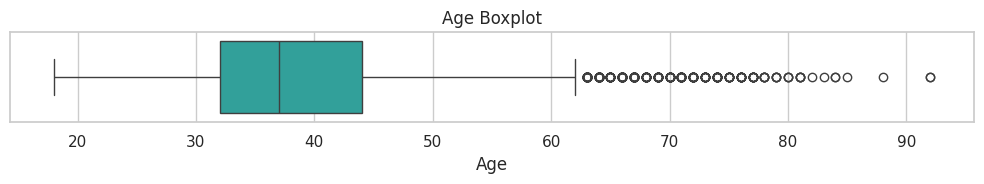


Summary Statistics for Age:
 count    10000.000000
mean        38.922903
std         10.487128
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64


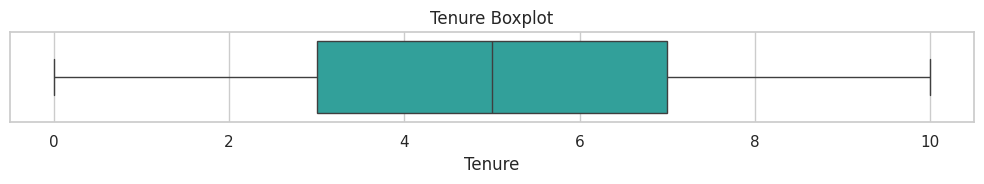


Summary Statistics for Tenure:
 count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64


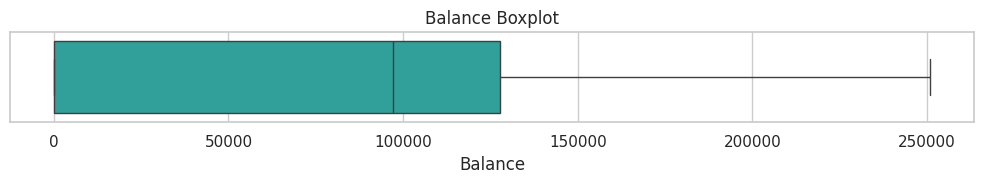


Summary Statistics for Balance:
 count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64


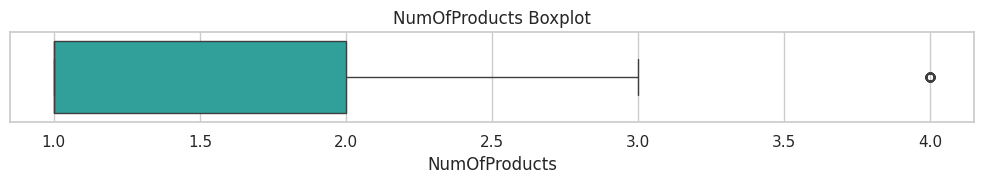


Summary Statistics for NumOfProducts:
 count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64


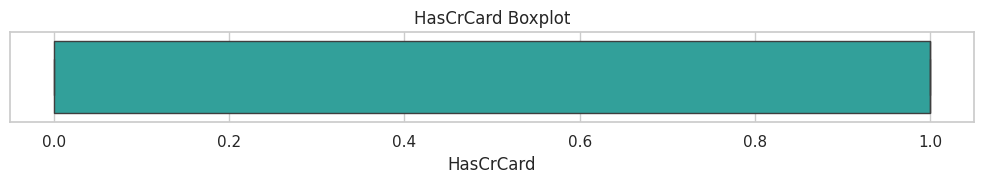


Summary Statistics for HasCrCard:
 count    10000.000000
mean         0.705400
std          0.455886
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HasCrCard, dtype: float64


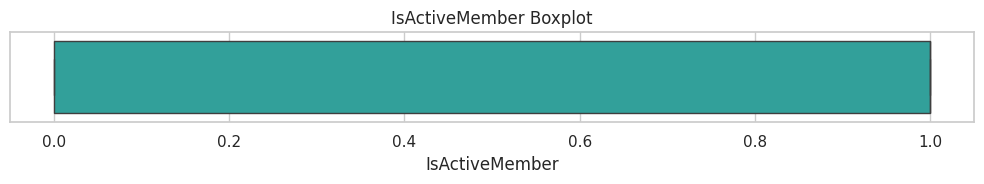


Summary Statistics for IsActiveMember:
 count    10000.0000
mean         0.5150
std          0.4998
min          0.0000
25%          0.0000
50%          1.0000
75%          1.0000
max          1.0000
Name: IsActiveMember, dtype: float64


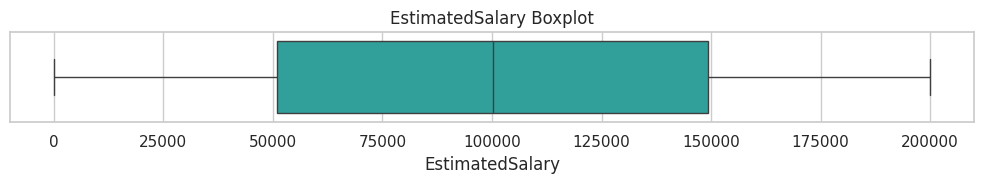


Summary Statistics for EstimatedSalary:
 count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64


In [ ]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))

    sns.boxplot(x=data[column], color='lightseagreen')
    plt.title(f'{title} Boxplot')

    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

columns_to_analyze = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

for column in columns_to_analyze:
    univariate_analysis(churndata, column, column.replace('_', ' '))

In [ ]:
def plot_categorical_distribution(column_name, data=churndata):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=churndata, palette='Set2')
    plt.title(f'Distribution of {column_name}')

    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')

    sns.despine(left=True, bottom=True)

    plt.subplot(1, 2, 2)
    churndata[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90, explode=[0.05]*churndata[column_name].nunique())
    plt.title(f'Percentage Distribution of {column_name}')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

<ipython-input-27-09e863cb9495>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=churndata, palette='Set2')


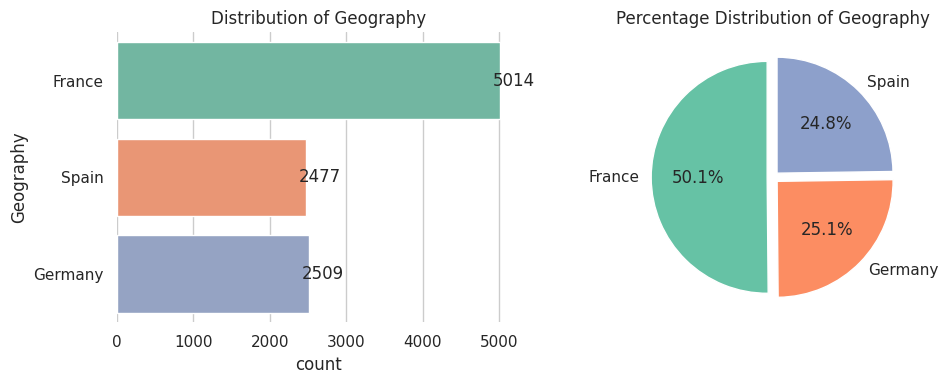

In [ ]:
# Plotting for 'Geography'
plot_categorical_distribution('Geography')

<ipython-input-27-09e863cb9495>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=churndata, palette='Set2')


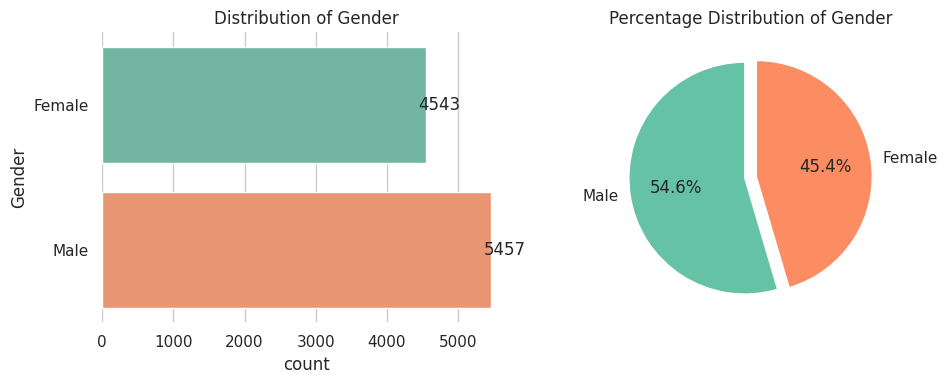

In [ ]:
# Plotting for 'Gender'
plot_categorical_distribution('Gender')

In [ ]:
# Create a crosstab of Geography and Exited
contingency_table = pd.crosstab(churndata['Geography'], churndata['Exited'])

# Display the crosstab
print(contingency_table)

Exited        0    1
Geography           
France     4204  810
Germany    1695  814
Spain      2064  413


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

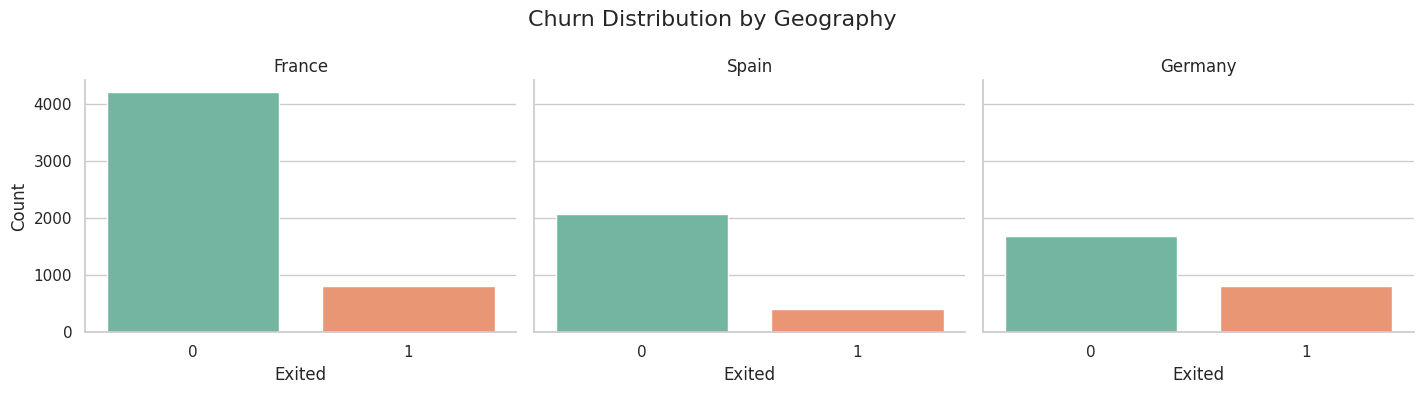

In [ ]:
# Create a FacetGrid to visualize Geography by Exited
g = sns.FacetGrid(churndata, col='Geography', height=4, aspect=1.2)

g.map(sns.countplot, 'Exited', palette='Set2')
g.set_titles("{col_name}")
g.set_axis_labels("Exited", "Count")
g.fig.suptitle('Churn Distribution by Geography', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Create a crosstab of Gender and Exited
contingency_table = pd.crosstab(churndata['Gender'], churndata['Exited'])

# Display the crosstab
print(contingency_table)

Exited     0     1
Gender            
Female  3404  1139
Male    4559   898


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


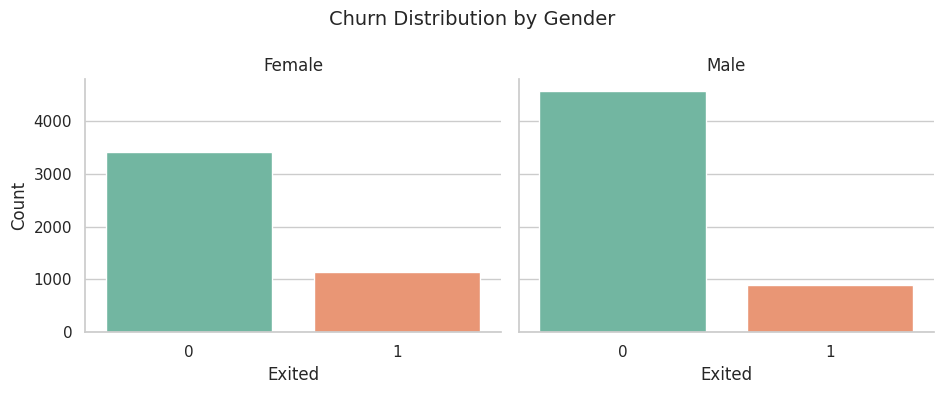

In [ ]:
# Create a FacetGrid to visualize Gender by Exited
g = sns.FacetGrid(churndata, col='Gender', height=4, aspect=1.2)

g.map(sns.countplot, 'Exited', palette='Set2')
g.set_titles("{col_name}")
g.set_axis_labels("Exited", "Count")
g.fig.suptitle('Churn Distribution by Gender', fontsize=14)
plt.tight_layout()
plt.show()

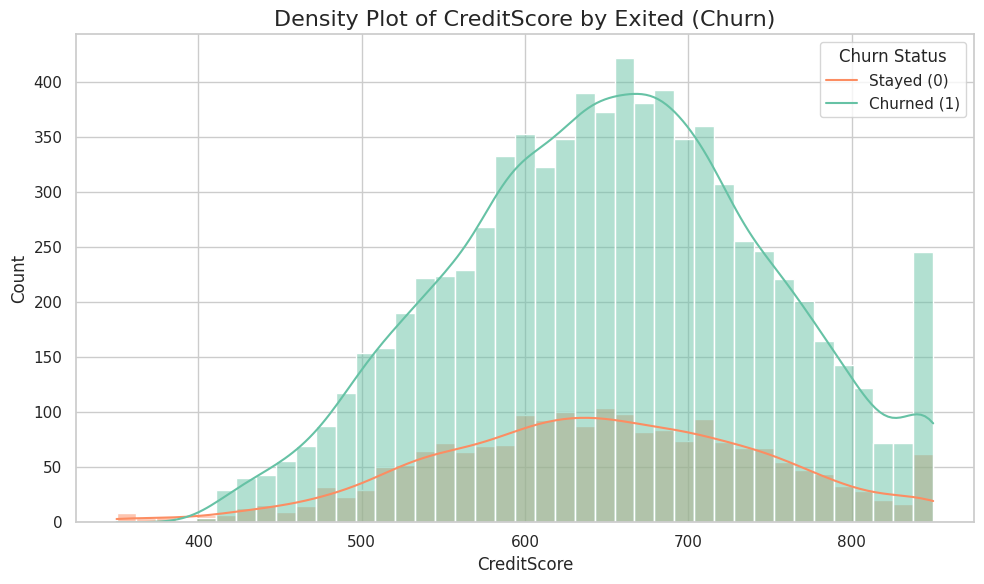

In [ ]:
# Create a histplot for CreditScore by Exited
plt.figure(figsize=(10, 6))
sns.histplot(data=churndata, x='CreditScore', hue='Exited', kde=True, fill=True, palette='Set2')
plt.title('Density Plot of CreditScore by Exited (Churn)', fontsize=16)
plt.xlabel('CreditScore')
plt.ylabel('Count')
plt.legend(title='Churn Status', labels=['Stayed (0)', 'Churned (1)'])
plt.tight_layout()
plt.show()

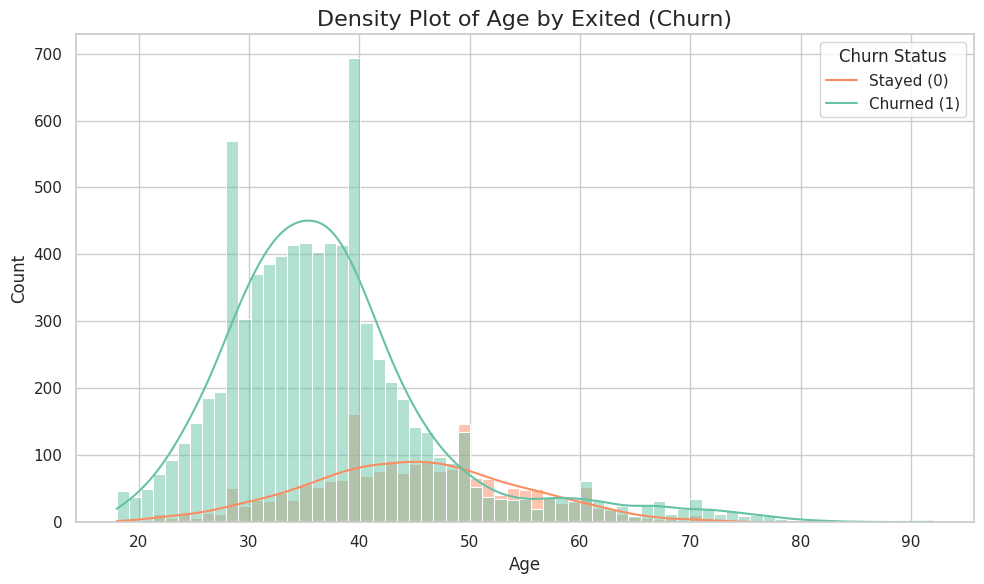

In [ ]:
# Create a histplot for Age by Exited
plt.figure(figsize=(10, 6))
sns.histplot(data=churndata, x='Age', hue='Exited', kde=True, fill=True, palette='Set2')
plt.title('Density Plot of Age by Exited (Churn)', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Churn Status', labels=['Stayed (0)', 'Churned (1)'])
plt.tight_layout()
plt.show()

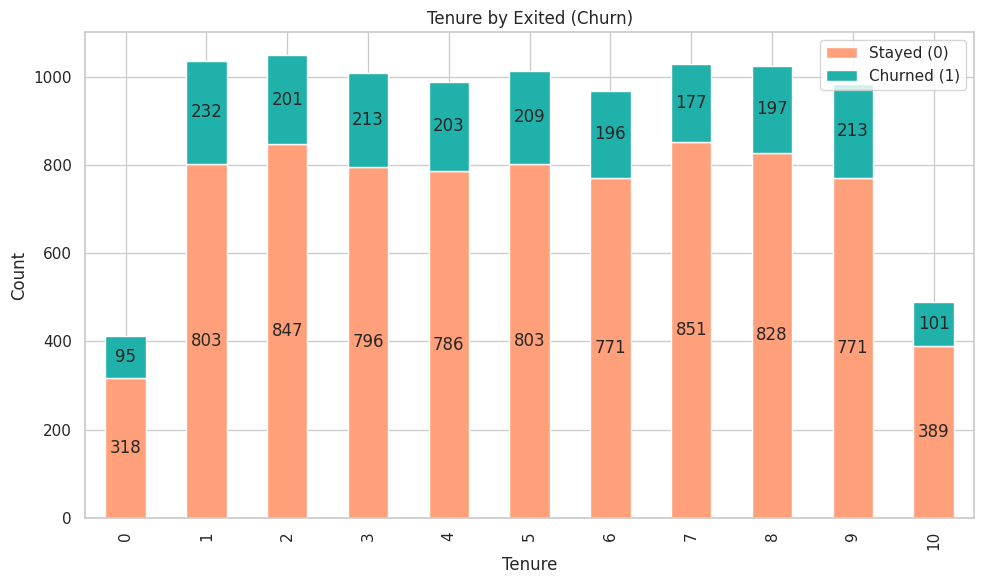

In [ ]:
# Group the data by Tenure and Exited to get counts
tenure_exited_counts = churndata.groupby(['Tenure', 'Exited']).size().unstack()
ax = tenure_exited_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightsalmon', 'lightseagreen'])

plt.title('Tenure by Exited (Churn)')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend(['Stayed (0)', 'Churned (1)'])
plt.tight_layout()

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 0:  # Avoid labels for zero heights
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2
        ax.annotate(f'{int(height)}', (x, y), ha='center', va='center')

plt.show()

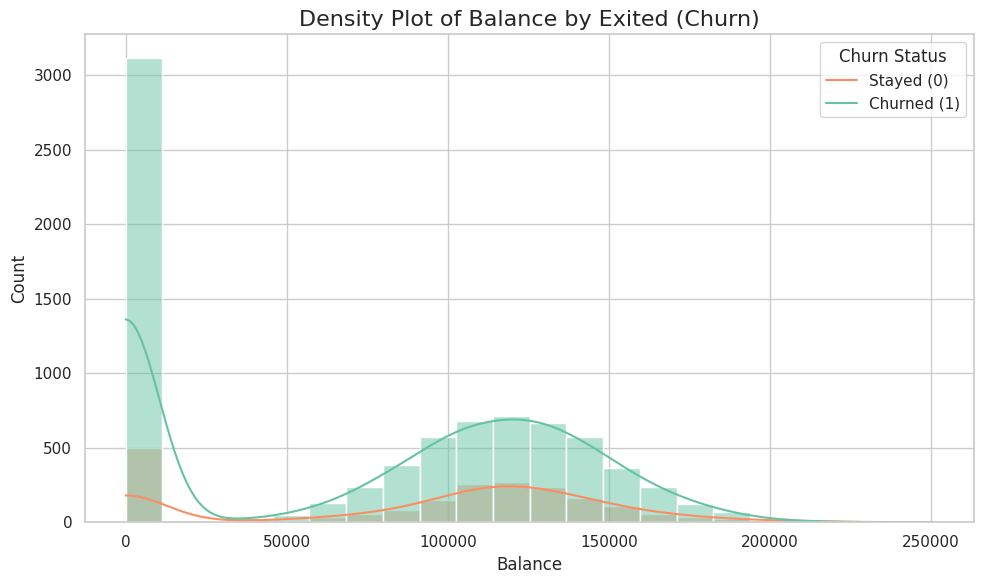

In [ ]:
# Create a histplot for Balance by Exited
plt.figure(figsize=(10, 6))
sns.histplot(data=churndata, x='Balance', hue='Exited', kde=True, fill=True, palette='Set2')
plt.title('Density Plot of Balance by Exited (Churn)', fontsize=16)
plt.xlabel('Balance')
plt.ylabel('Count')
plt.legend(title='Churn Status', labels=['Stayed (0)', 'Churned (1)'])
plt.tight_layout()
plt.show()

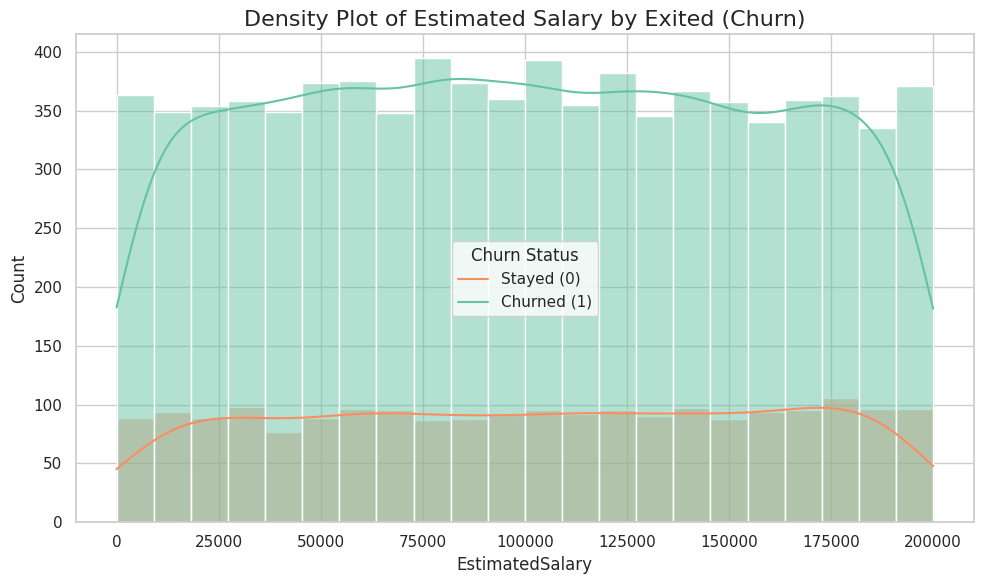

In [ ]:
# Create a histplot for EstimatedSalary by Exited
plt.figure(figsize=(10, 6))
sns.histplot(data=churndata, x='EstimatedSalary', hue='Exited', kde=True, fill=True, palette='Set2')
plt.title('Density Plot of Estimated Salary by Exited (Churn)', fontsize=16)
plt.xlabel('EstimatedSalary')
plt.ylabel('Count')
plt.legend(title='Churn Status', labels=['Stayed (0)', 'Churned (1)'])
plt.tight_layout()
plt.show()

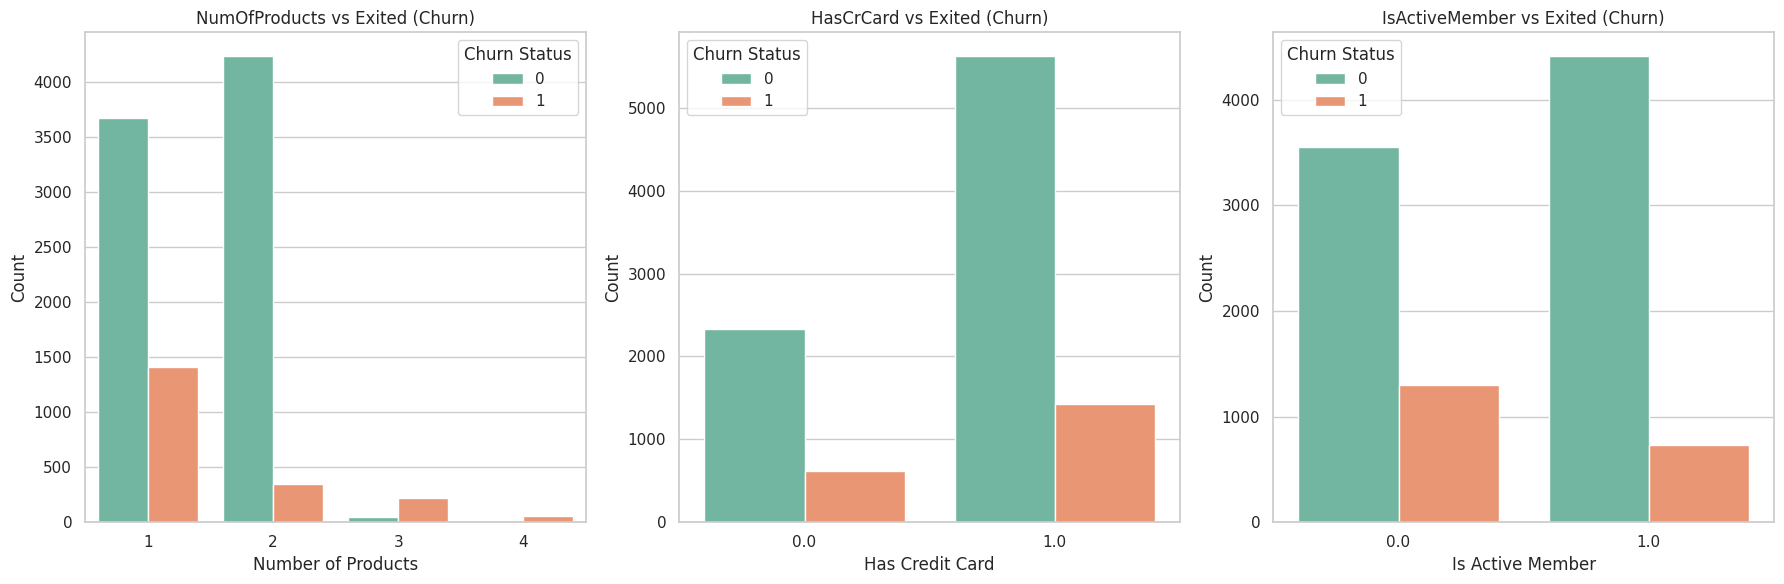

In [ ]:
plt.figure(figsize=(18, 6))

# Countplot for NumOfProducts vs Exited
plt.subplot(1, 3, 1)
sns.countplot(data=churndata, x='NumOfProducts', hue='Exited', palette='Set2')
plt.title('NumOfProducts vs Exited (Churn)')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.legend(title='Churn Status')

# Countplot for HasCrCard vs Exited
plt.subplot(1, 3, 2)
sns.countplot(data=churndata, x='HasCrCard', hue='Exited', palette='Set2')
plt.title('HasCrCard vs Exited (Churn)')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.legend(title='Churn Status')

# Countplot for IsActiveMember vs Exited
plt.subplot(1, 3, 3)
sns.countplot(data=churndata, x='IsActiveMember', hue='Exited', palette='Set2')
plt.title('IsActiveMember vs Exited (Churn)')
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.legend(title='Churn Status')

plt.tight_layout()
plt.show()

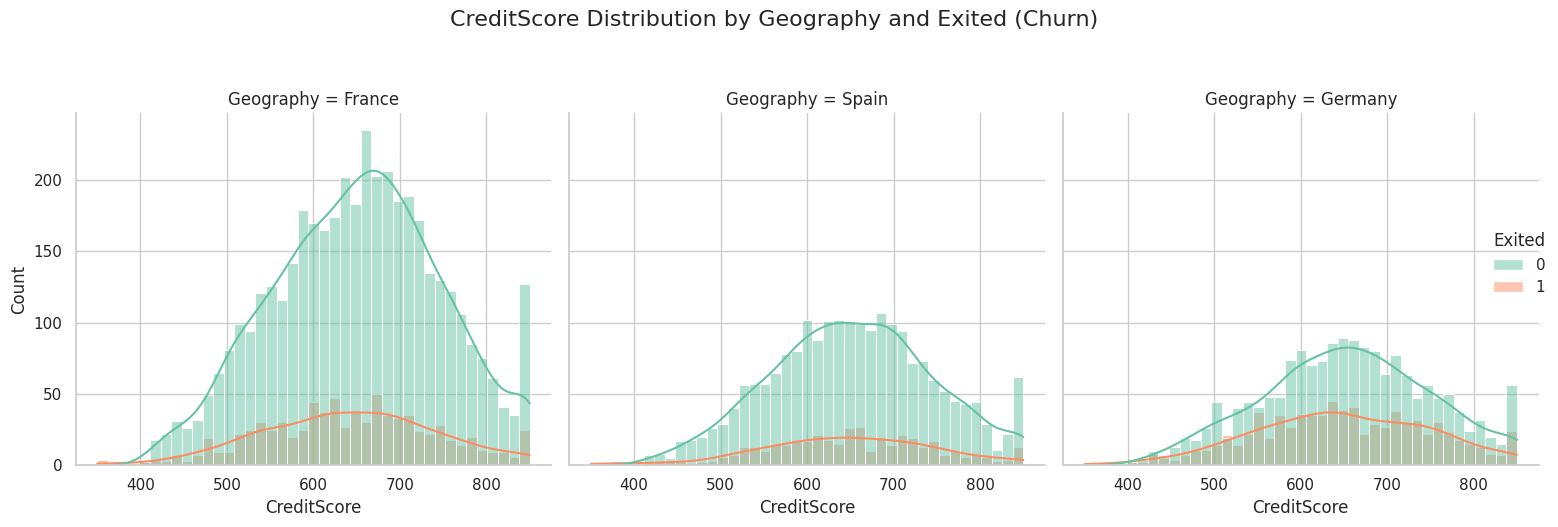

In [ ]:
# Create the displot
g = sns.displot(data=churndata, x="CreditScore", col="Geography", hue="Exited", kde=True, palette='Set2')
g.fig.suptitle('CreditScore Distribution by Geography and Exited (Churn)', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

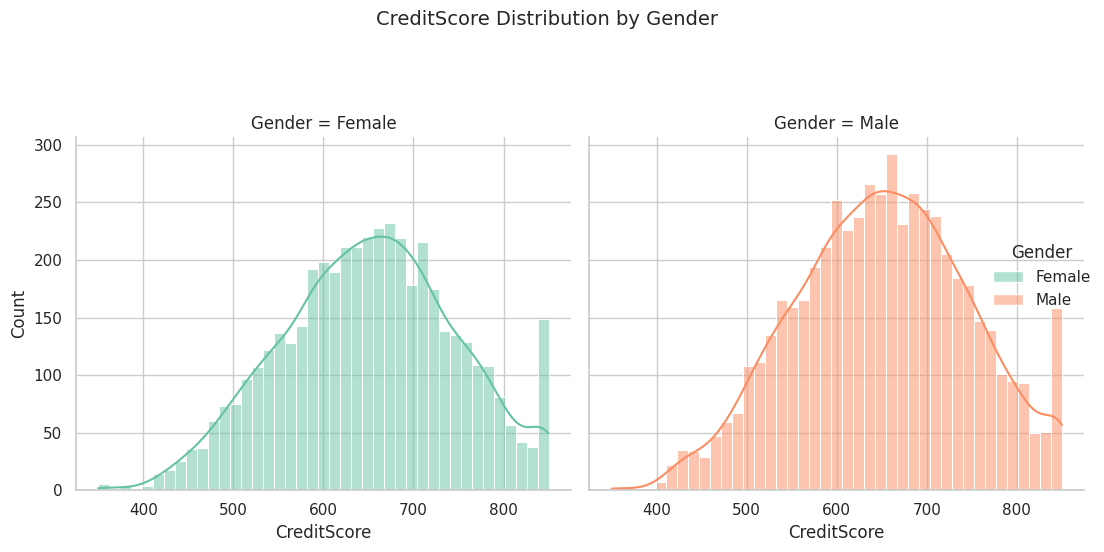

In [ ]:
# Create the displot
g = sns.displot(data=churndata, x="CreditScore", col="Gender", hue="Gender", kde=True, palette='Set2')
g.fig.suptitle('CreditScore Distribution by Gender', fontsize=14, y=1.10)
plt.tight_layout()
plt.show()

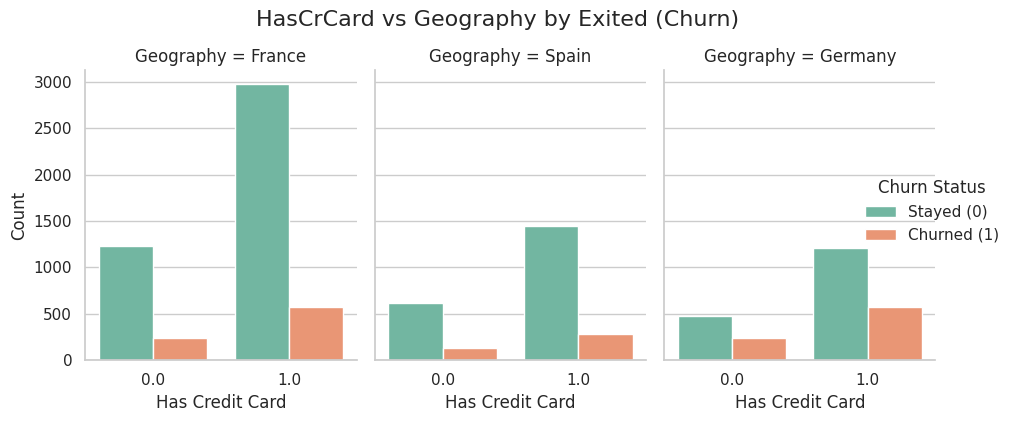

In [ ]:
# Create a catplot to visualize HasCrCard vs Geography by Exited
g = sns.catplot(
    data=churndata,
    x='HasCrCard',
    hue='Exited',
    col='Geography',
    kind='count',
    palette='Set2',
    height=4,
    aspect=0.8
)

g.fig.suptitle('HasCrCard vs Geography by Exited (Churn)', fontsize=16, y=1.05)
g.set_axis_labels('Has Credit Card', 'Count')
g._legend.set_title('Churn Status')
new_labels = ['Stayed (0)', 'Churned (1)']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.show()

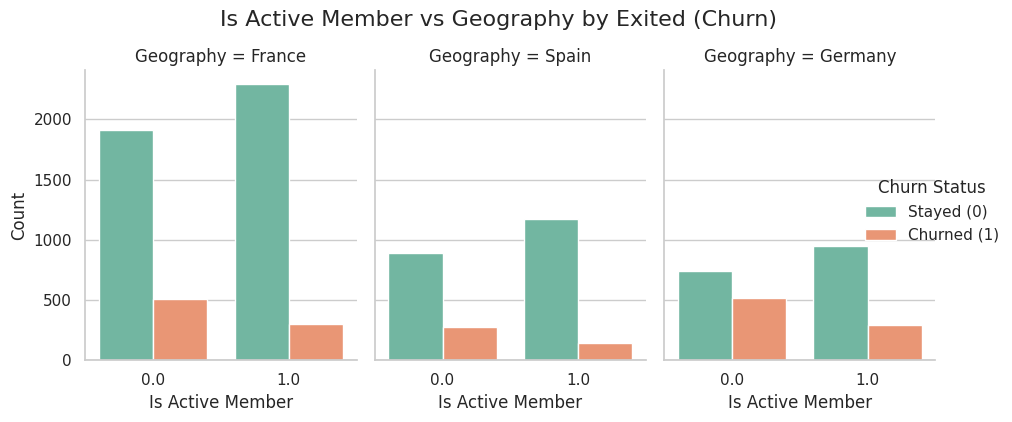

In [ ]:
# Create a catplot to visualize IsActiveMember vs Geography by Exited
g = sns.catplot(
    data=churndata,
    x='IsActiveMember',
    hue='Exited',
    col='Geography',
    kind='count',
    palette='Set2',
    height=4,
    aspect=0.8
)

g.fig.suptitle('Is Active Member vs Geography by Exited (Churn)', fontsize=16, y=1.05)
g.set_axis_labels('Is Active Member', 'Count')
g._legend.set_title('Churn Status')
new_labels = ['Stayed (0)', 'Churned (1)']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.show()

In [ ]:
# One-Hot Encoding for 'Geography'
churndata_encoded = pd.get_dummies(churndata, columns=['Geography'])

# Binary Encoding for 'Gender'
churndata_encoded['Gender'] = churndata_encoded['Gender'].map({'Male': 0, 'Female': 1})

# Display the encoded dataframe
print("Encoded DataFrame Head:\n", churndata_encoded.head())

Encoded DataFrame Head:
    CreditScore  Gender   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       1  42.0       2       0.00              1        1.0   
1          608       1  41.0       1   83807.86              1        0.0   
2          502       1  42.0       8  159660.80              3        1.0   
3          699       1  39.0       1       0.00              2        0.0   
4          850       1  43.0       2  125510.82              1        0.0   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0             1.0        101348.88       1              True   
1             1.0        112542.58       0             False   
2             0.0        113931.57       1              True   
3             0.0         93826.63       0              True   
4             1.0         79084.10       0             False   

   Geography_Germany  Geography_Spain  
0              False            False  
1              False             True  
2      

In [ ]:
# Check the original class distribution
original_class_distribution = churndata_encoded['Exited'].value_counts()
print("\nOriginal Class Distribution:\n", original_class_distribution)


Original Class Distribution:
 Exited
0    7963
1    2037
Name: count, dtype: int64


In [ ]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Separate the majority and minority classes
majority_class = churndata_encoded[churndata_encoded['Exited'] == 0]
minority_class = churndata_encoded[churndata_encoded['Exited'] == 1]

# Oversample the minority class
minority_oversampled = resample(minority_class,
                                replace=True,
                                n_samples=len(majority_class),
                                random_state=42)

# Combine the majority class with the oversampled minority class
data_balanced = pd.concat([majority_class, minority_oversampled])

# Check the new class distribution after oversampling
churndata_balanced_distribution = data_balanced['Exited'].value_counts()
print("\nNew Class Distribution After Oversampling:\n", churndata_balanced_distribution)


New Class Distribution After Oversampling:
 Exited
0    7963
1    7963
Name: count, dtype: int64


<ipython-input-52-22f23aa97733>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=original_class_distribution.index, y=original_class_distribution, ax=axes[0], palette='Set2')
<ipython-input-52-22f23aa97733>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churndata_balanced_distribution.index, y=churndata_balanced_distribution, ax=axes[1], palette='Set2')


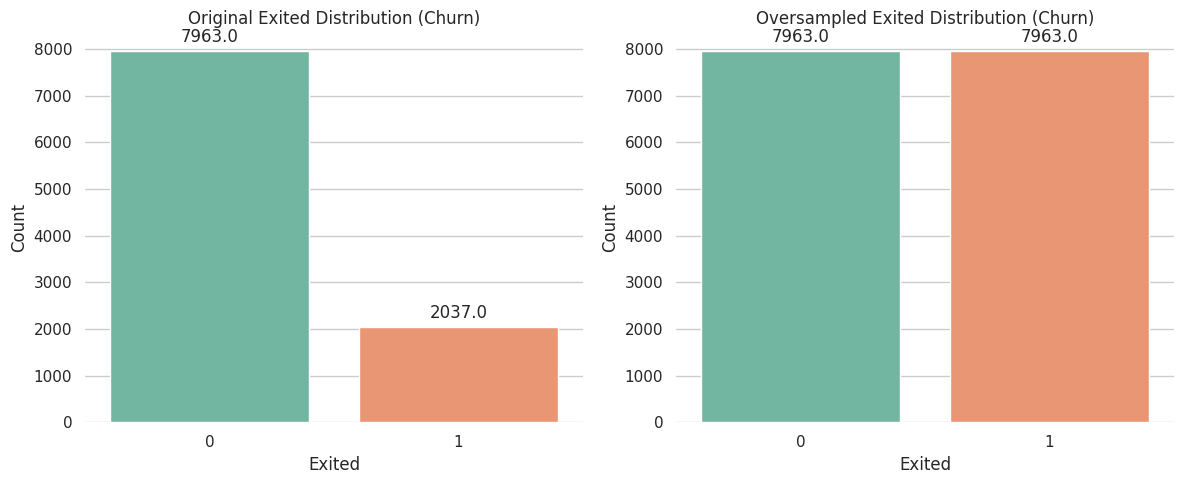

In [ ]:
# Visualize the class distribution before and after oversampling
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Original distribution
sns.barplot(x=original_class_distribution.index, y=original_class_distribution, ax=axes[0], palette='Set2')
axes[0].set_title('Original Exited Distribution (Churn)')
axes[0].set_ylabel('Count')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.despine(left=True, bottom=True)

# New distribution after oversampling
sns.barplot(x=churndata_balanced_distribution.index, y=churndata_balanced_distribution, ax=axes[1], palette='Set2')
axes[1].set_title('Oversampled Exited Distribution (Churn)')
axes[1].set_ylabel('Count')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

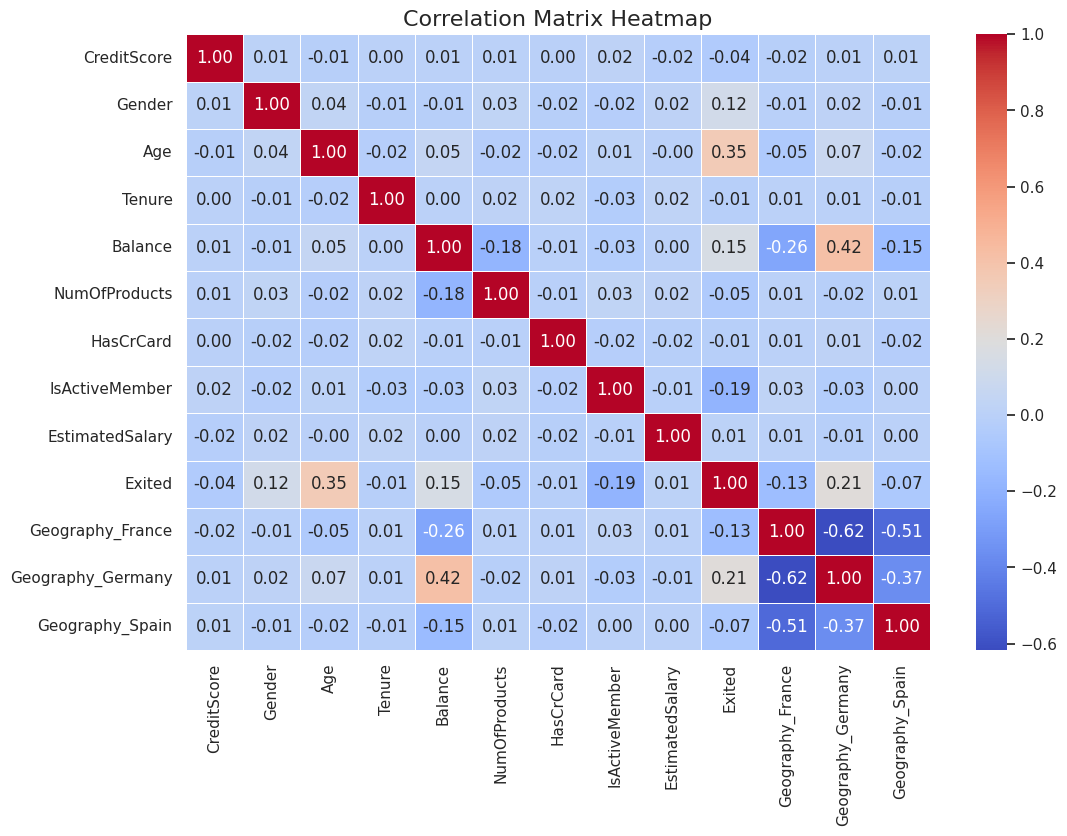

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data_balanced.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Define features (X) and target (y)
X = data_balanced.drop('Exited', axis=1)
y = data_balanced['Exited']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the training and testing sets
print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Testing Set: {X_test.shape}, {y_test.shape}")

Training Set: (12740, 12), (12740,)
Testing Set: (3186, 12), (3186,)


In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [ ]:
# Display model names to confirm initialization
print("Models initialized:", list(models.keys()))

Models initialized: ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost']



Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1593
           1       0.70      0.68      0.69      1593

    accuracy                           0.70      3186
   macro avg       0.70      0.70      0.70      3186
weighted avg       0.70      0.70      0.70      3186



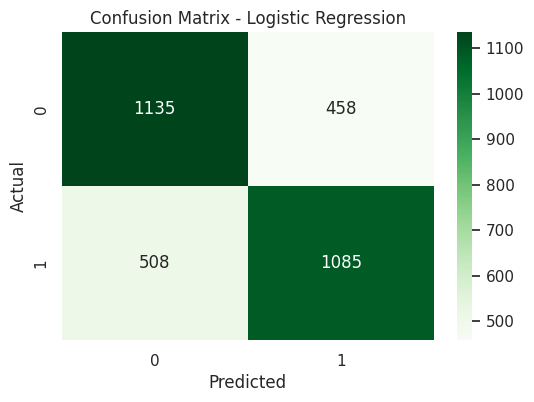


Model: SVM
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1593
           1       0.80      0.80      0.80      1593

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



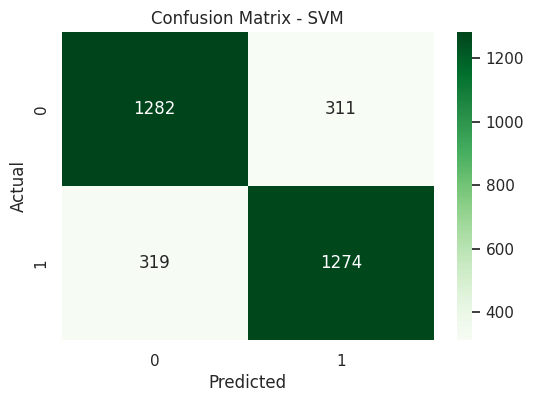


Model: Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1593
           1       0.87      0.98      0.92      1593

    accuracy                           0.92      3186
   macro avg       0.92      0.92      0.92      3186
weighted avg       0.92      0.92      0.92      3186



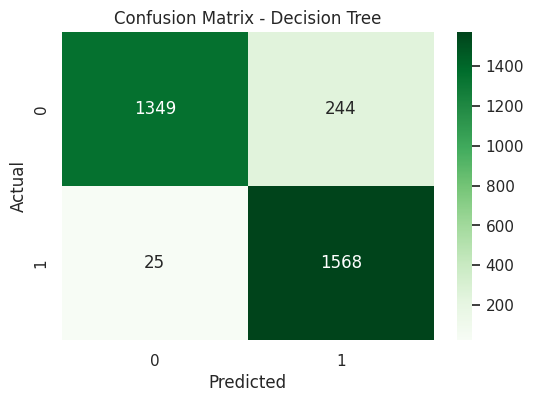


Model: Random Forest
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1593
           1       0.93      0.98      0.95      1593

    accuracy                           0.95      3186
   macro avg       0.95      0.95      0.95      3186
weighted avg       0.95      0.95      0.95      3186



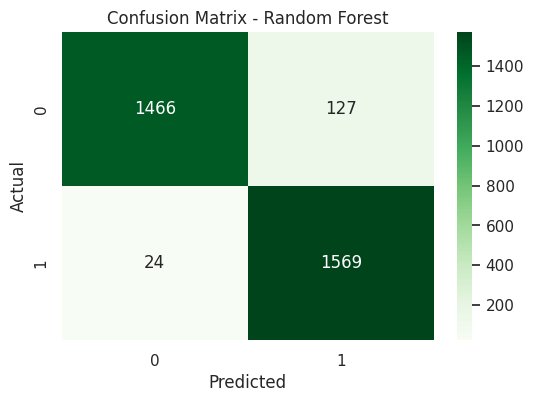


Model: XGBoost
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1593
           1       0.86      0.93      0.90      1593

    accuracy                           0.89      3186
   macro avg       0.90      0.89      0.89      3186
weighted avg       0.90      0.89      0.89      3186



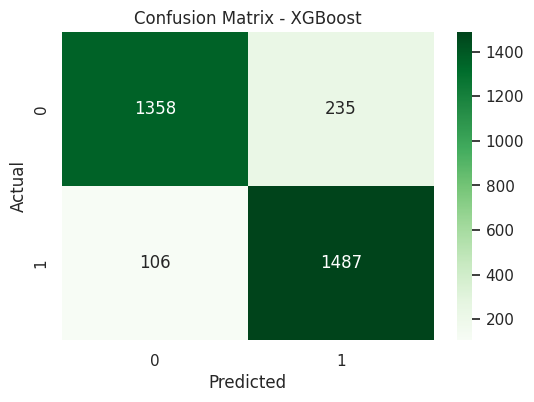


Model Accuracies:
Logistic Regression: 0.6968
SVM: 0.8023
Decision Tree: 0.9156
Random Forest: 0.9526
XGBoost: 0.8930


In [ ]:
# Function to train models and display results
def train_and_evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}

    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy

        # Display classification report
        print(f"\nModel: {name}")
        print(classification_report(y_test, y_pred))

        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    return results

    # Train and evaluate models
results = train_and_evaluate_models(models, X_train_scaled, X_test_scaled, y_train, y_test)

# Display model accuracies
print("\nModel Accuracies:")
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.4f}")

In [ ]:
# Identify the best model
best_model_name = max(results, key=results.get)
best_model_accuracy = results[best_model_name]
print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")


Best Model: Random Forest with Accuracy: 0.9526


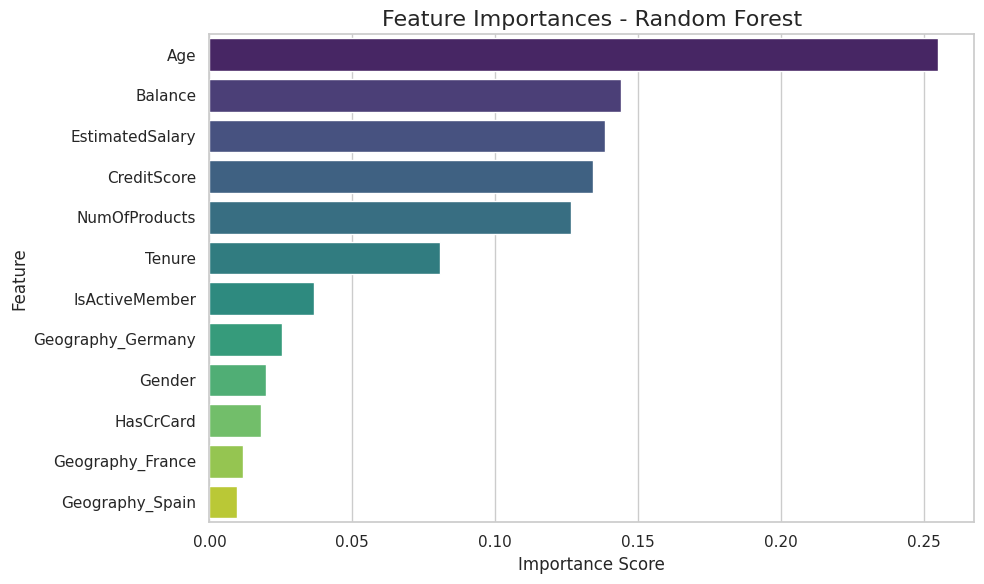

In [ ]:
# Plot feature importances if the best model supports it
best_model = models[best_model_name]
feature_importances = best_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title(f'Feature Importances - {best_model_name}', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
# Perform 5-fold cross-validation on the Random Forest model
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

Cross-Validation Scores: [0.93014129 0.9411303  0.93877551 0.93956044 0.93720565]
Mean CV Accuracy: 0.9374
